# GLOBAL POWER PLANT DATABASE 

### According to problem statement there are two target variables which are : primary_fuel and capacity_mw. So we need to make two models in which primary_fuel is a classification problem and capacity_mw is a regression problem. We will make two model and in that 1st primary_fuel is target variable and capacity_mw will drop and when we make 2nd model capacity_mw is a target variable and primary_fuel will be drop.

# MODEL 1 : primary_fuel is a target variable

## Importing Libreries

In [246]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [247]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Importing the dataset and see all columns with first five rows.

## Drop  capacity_mw column to make model 1 with primary_fuel is target variable

In [248]:
#drop capacity_mw column to make model 1
df=df.drop(['capacity_mw'], axis=1)

## Shape of data with number of rows and columns

In [249]:
df.shape

(908, 24)

There are 908 Rows and 24 Columns in dataset

## Detailed description

In [250]:
df.describe()

,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

## Datatypes of all columns

In [251]:
#check the data types of all the columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We have Float data type ----> latitude, longitude, other_fuel3, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, estimated_generation_gwh.

object datatypes ----> country, country_long, name, gppd_idnr, primary_fuel, other_fuel1, other_fuel2, owner, source, url, geolocation_source, generation_data_source

all are independent variable accept primary_fuel. primary_fuel are target variable.

## Checking is there any null value in dataset

In [252]:
#check is there any null value present in any column

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are so many missing values in whole dataset. so we need to treat that and fill missing value.

## Visualization of null values

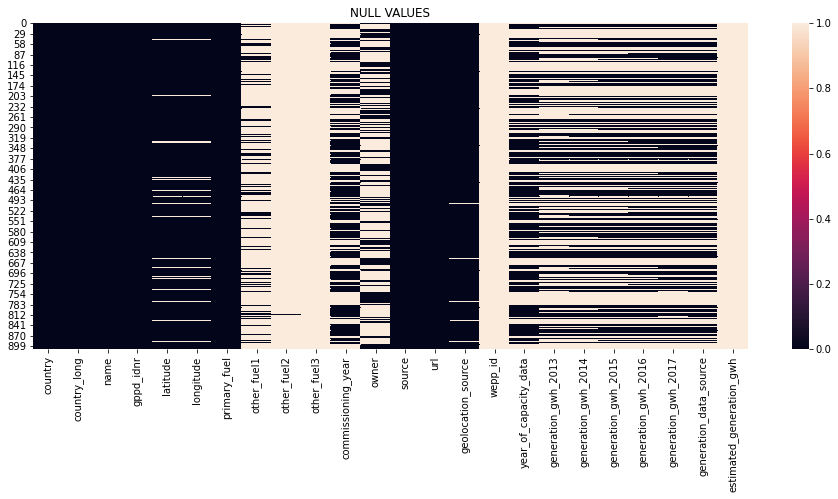

In [253]:
plt.figure(figsize=[16,6])
sn.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

As shown in plot the white line shows Null values in data set.

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   latitude                  862 non-null    float64
 5   longitude                 862 non-null    float64
 6   primary_fuel              908 non-null    object 
 7   other_fuel1               199 non-null    object 
 8   other_fuel2               1 non-null      object 
 9   other_fuel3               0 non-null      float64
 10  commissioning_year        528 non-null    float64
 11  owner                     342 non-null    object 
 12  source                    908 non-null    object 
 13  url                       908 non-null    object 
 14  geolocatio

We can see the complete information about data frame

#### check target variable and encode that to visualize data

In [255]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [256]:
df["primary_fuel"].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [257]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [258]:
df["primary_fuel"] = le.fit_transform(df["primary_fuel"].values.reshape(-1,1))

In [259]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

### Analysis through distplot

In [260]:
fe = df[['primary_fuel', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'estimated_generation_gwh']]

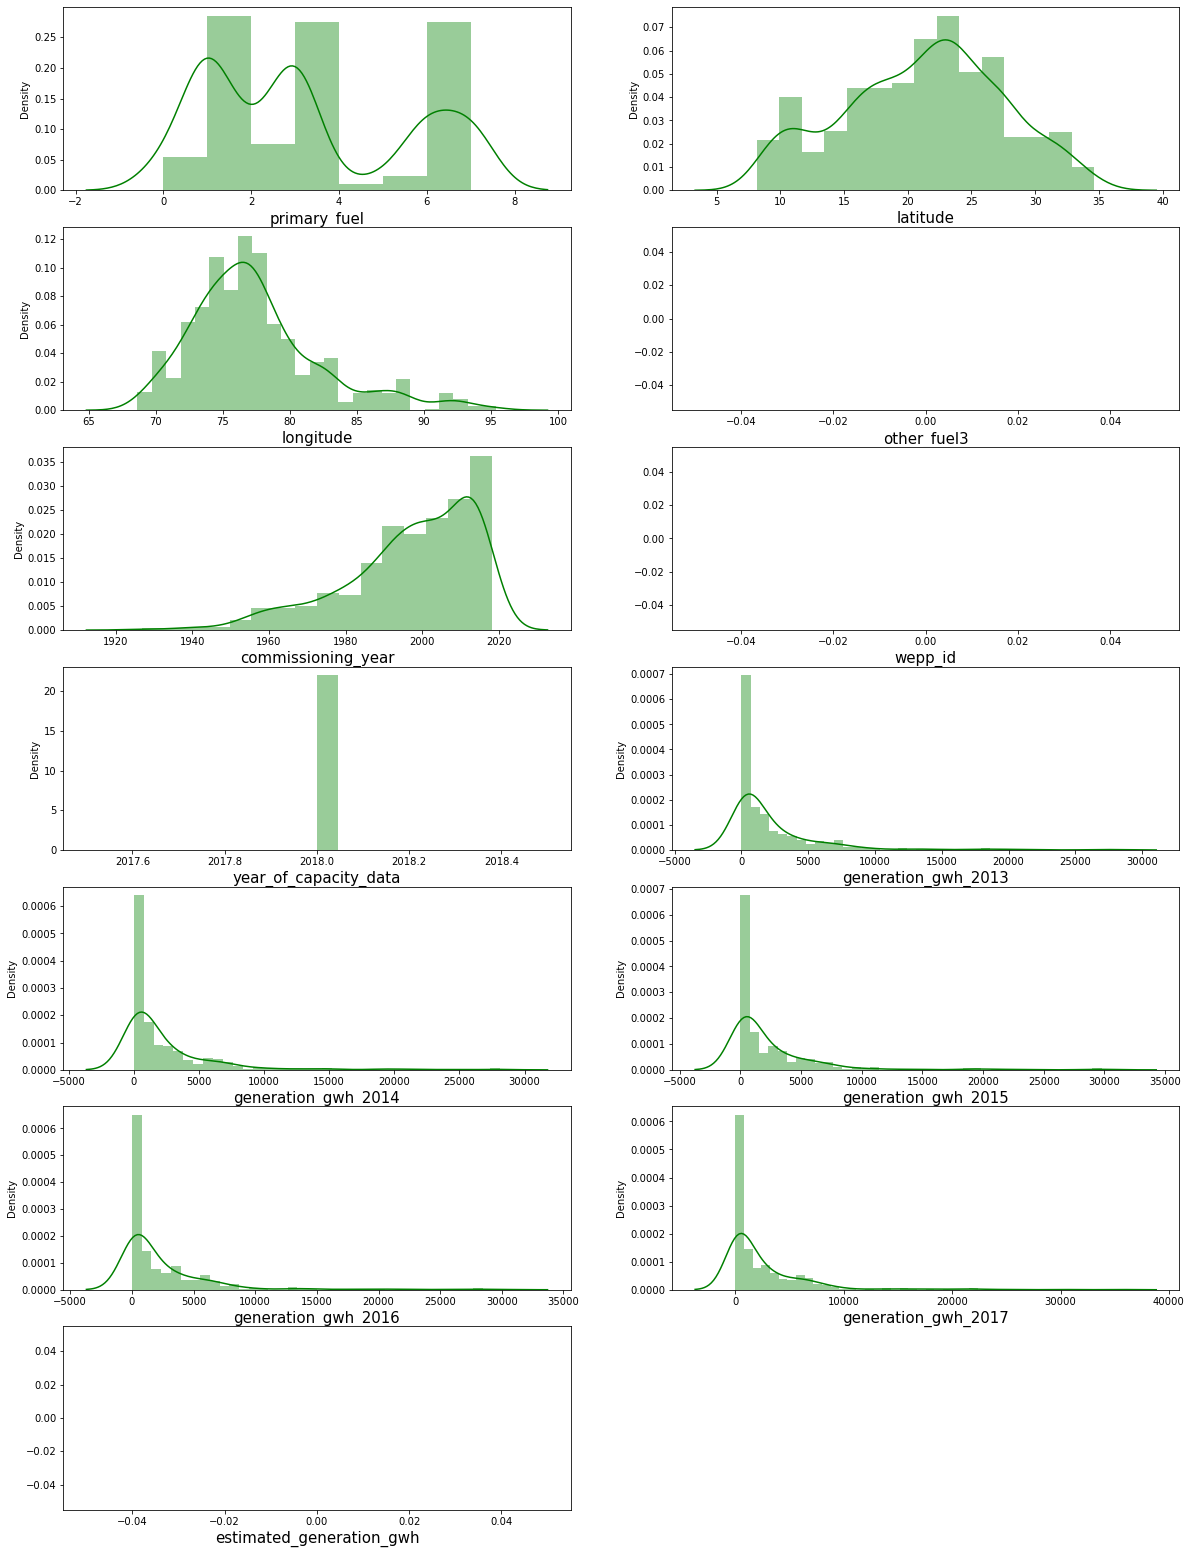

In [261]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 35: # as we see there are twentyfive columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

##### maximum column contains skewness('latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

### Analysis through boxplot

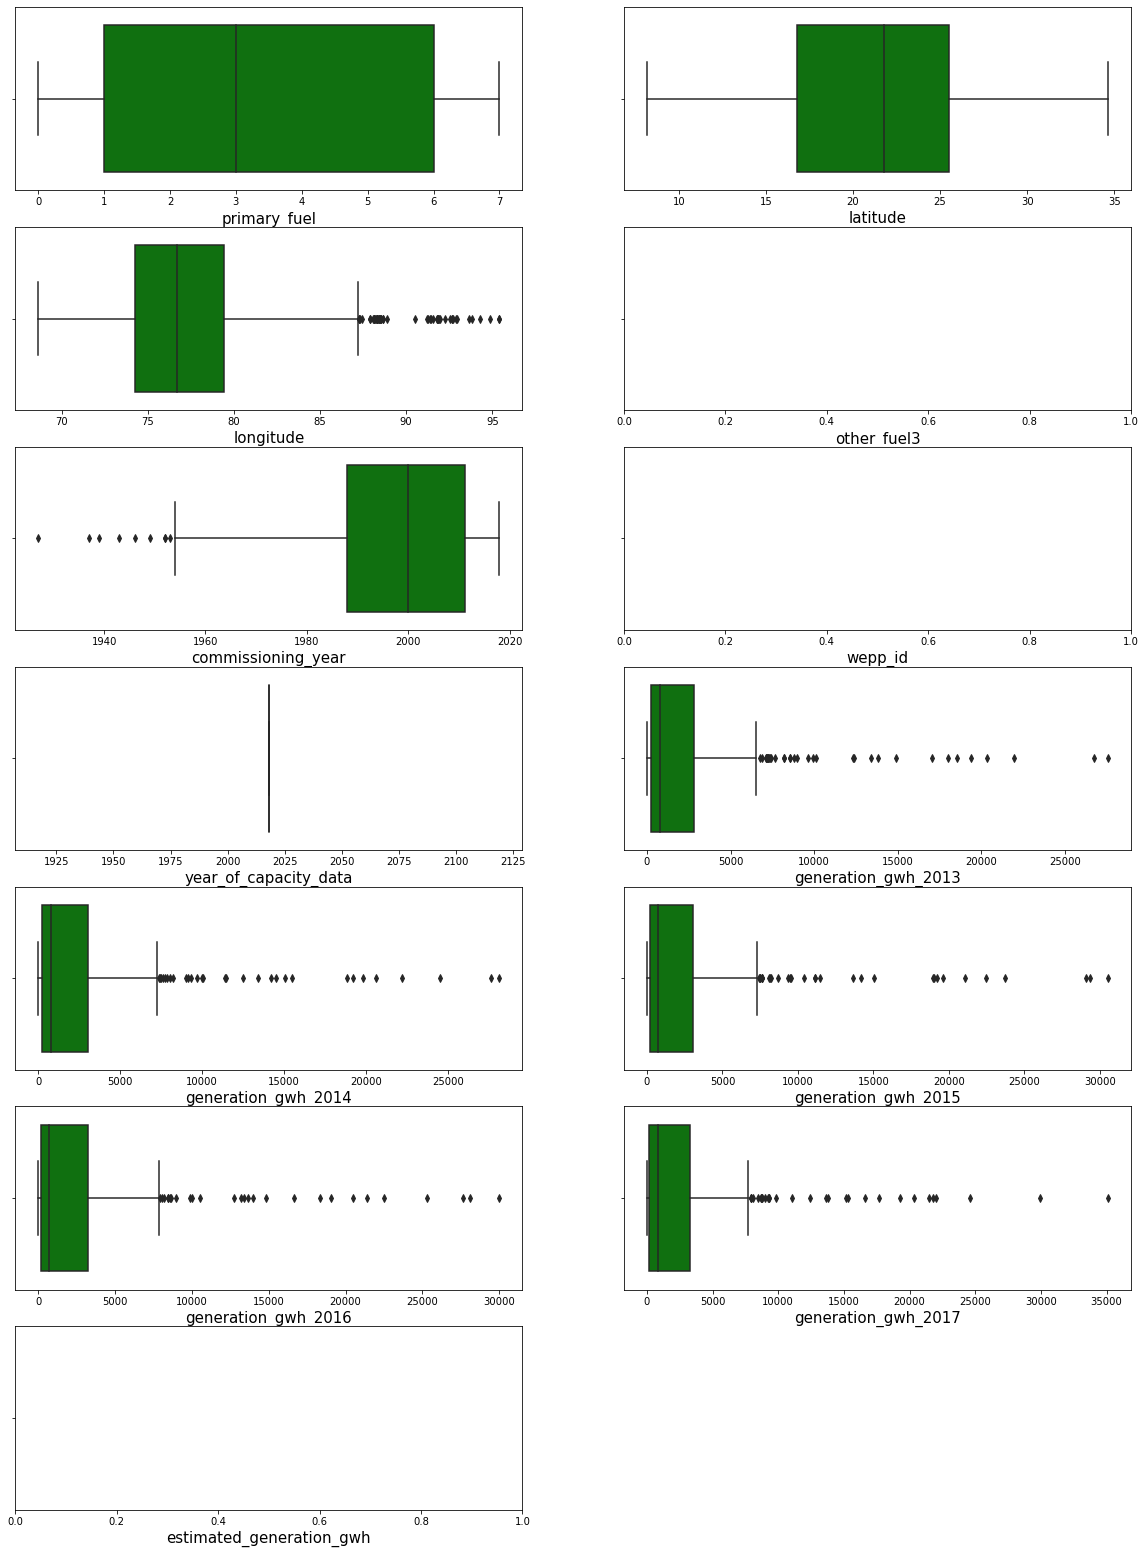

In [262]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 35: # as we see there are twentyfive columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.boxplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### maximum column contains outliers('latitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

### Analysis through histplot

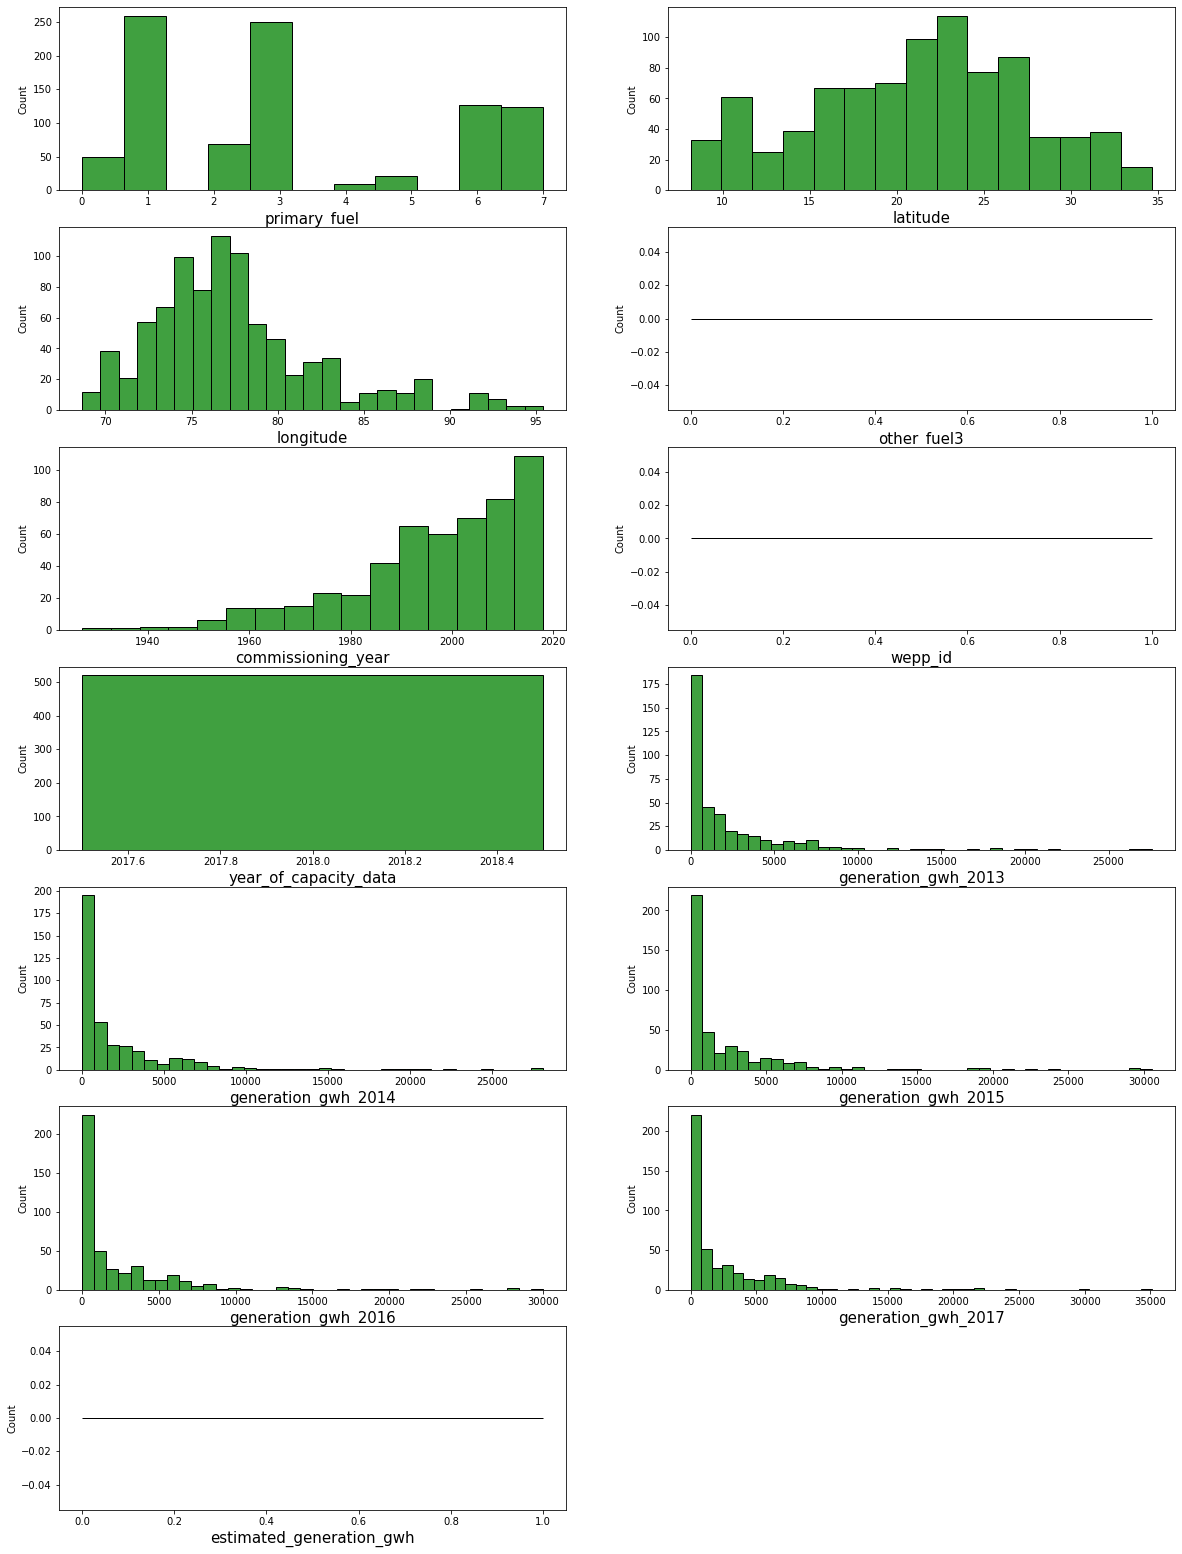

In [263]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 35: # as we see there are twentyfive columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.histplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### maximum column contains skewness('latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

## Bi variate analysis
Bi variate analysis is works with two variables.

In [264]:
feature = df[['primary_fuel', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'estimated_generation_gwh']]

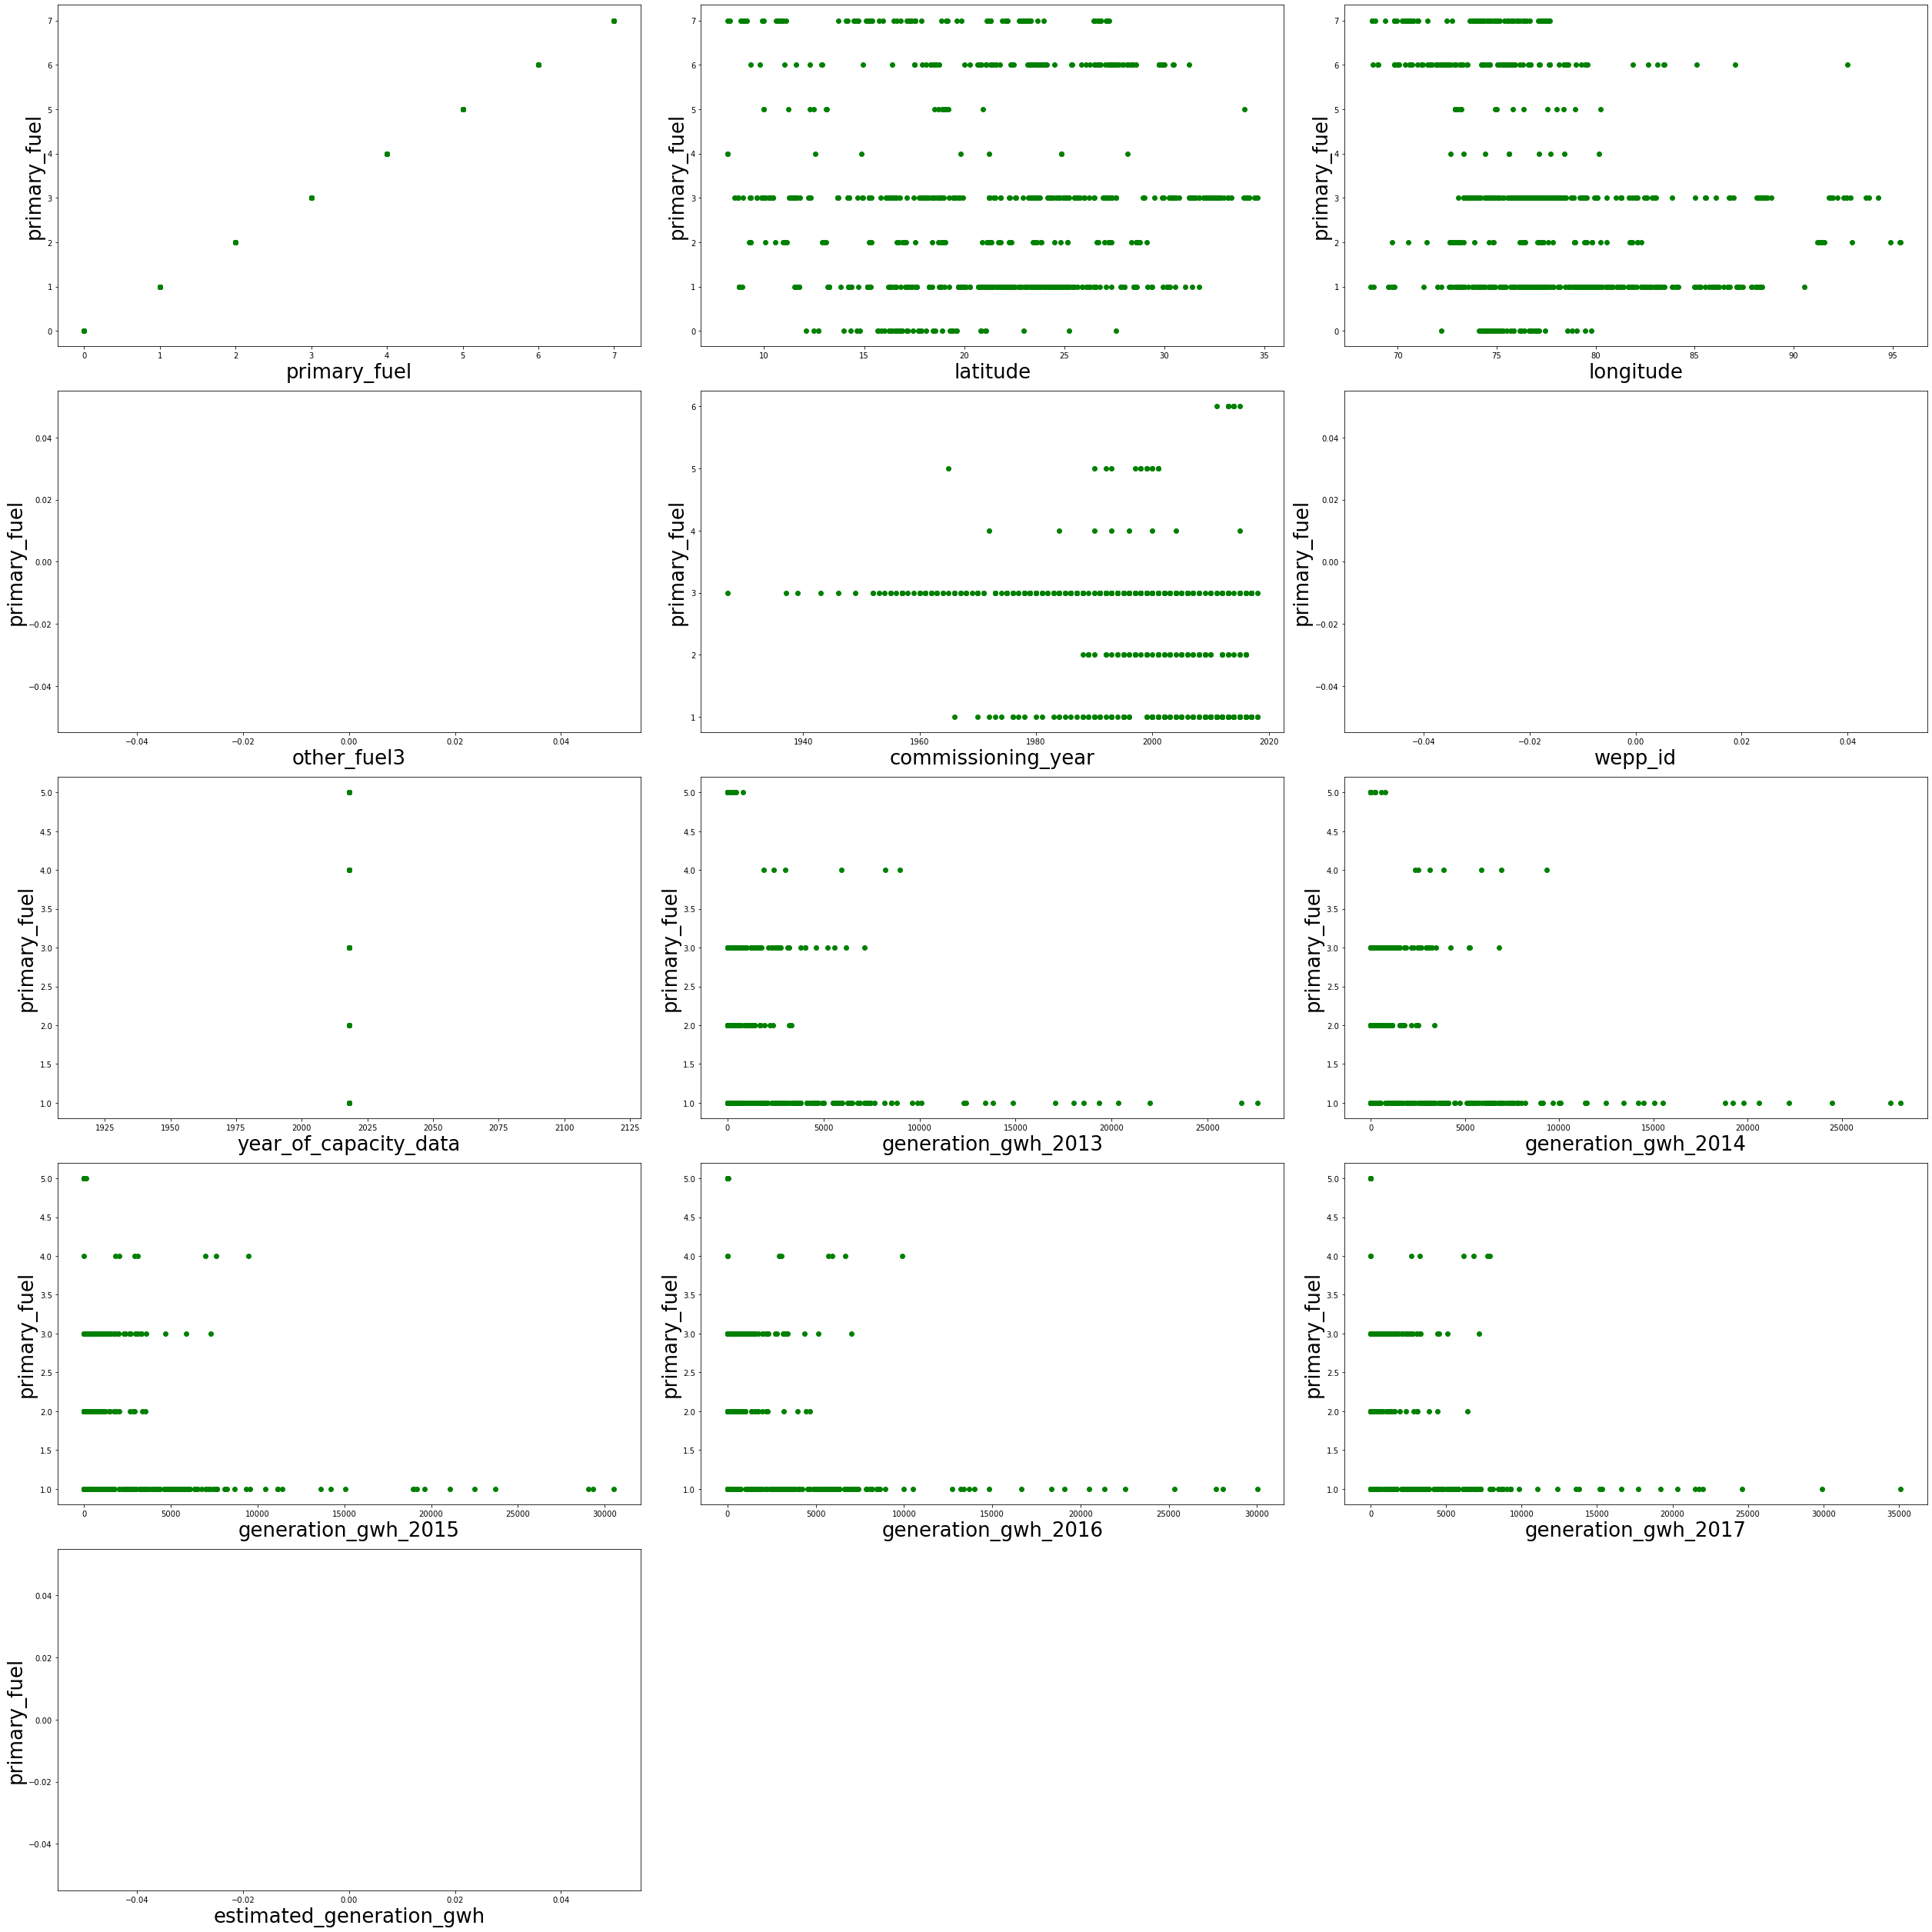

In [265]:
#Relationship Visualizing

plt.figure(figsize = (35,35), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(feature[column],feature['primary_fuel'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('primary_fuel', fontsize=26)
    plotnumber += 1
plt.tight_layout()

There are some variables are having some amount of linear relationship with target variable
and some are having  non linear relationship with target variable.

As we see in the plot some outliers are also present in it.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

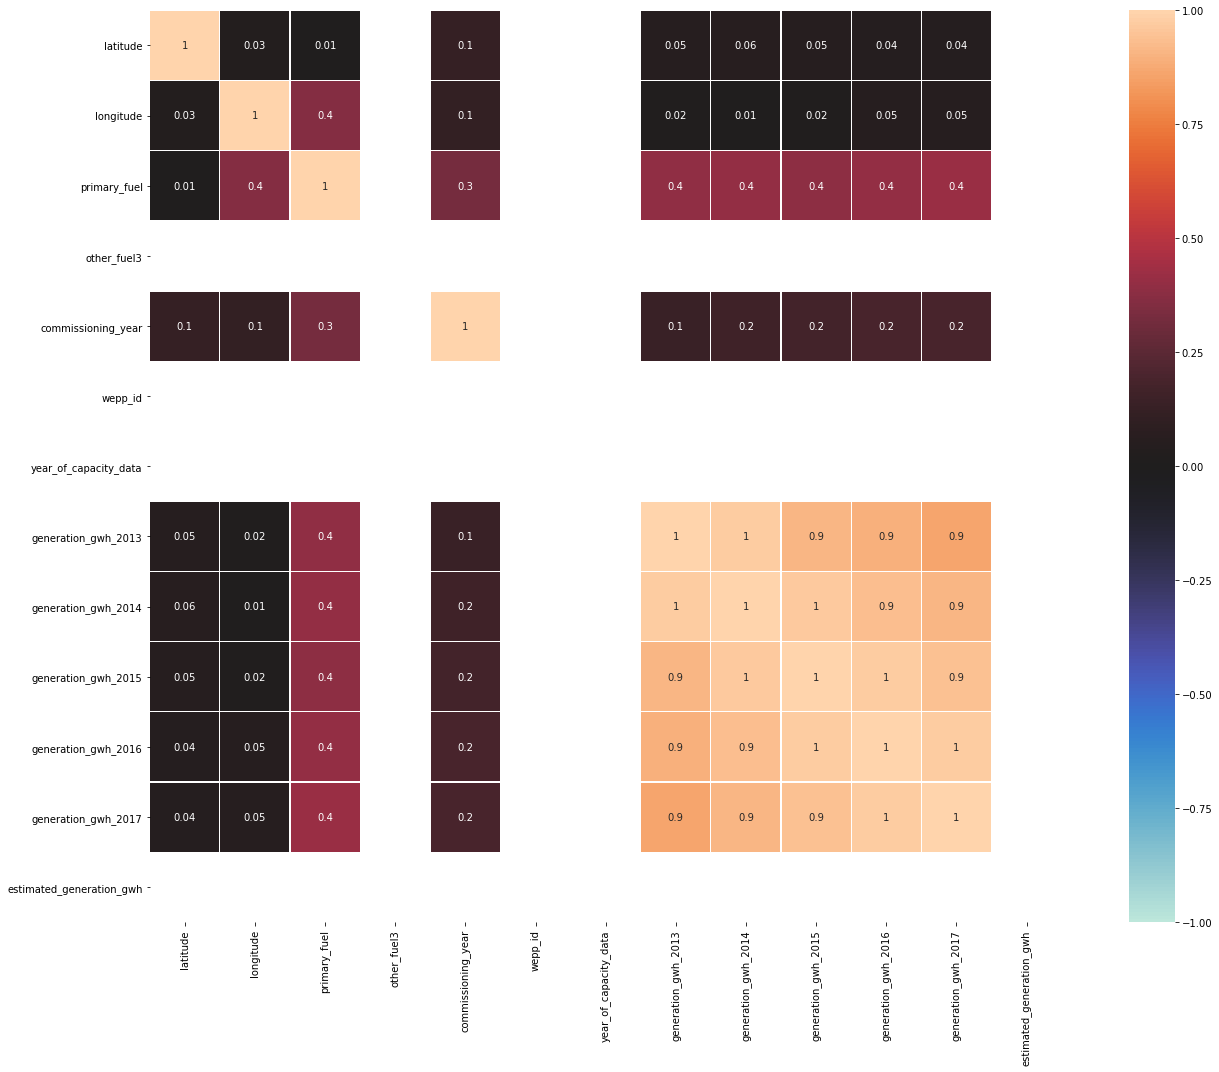

In [266]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

##### As shown in plot other_fuel3, wepp_id, year_of_capacity_data and estimated_generation_gwh are not having relationship with target variable and other  input variables are almost having good relation with target variable.

##### latitude is also having poor corelation with target variable

## Find out which columns are positively and negatively correlated with each other

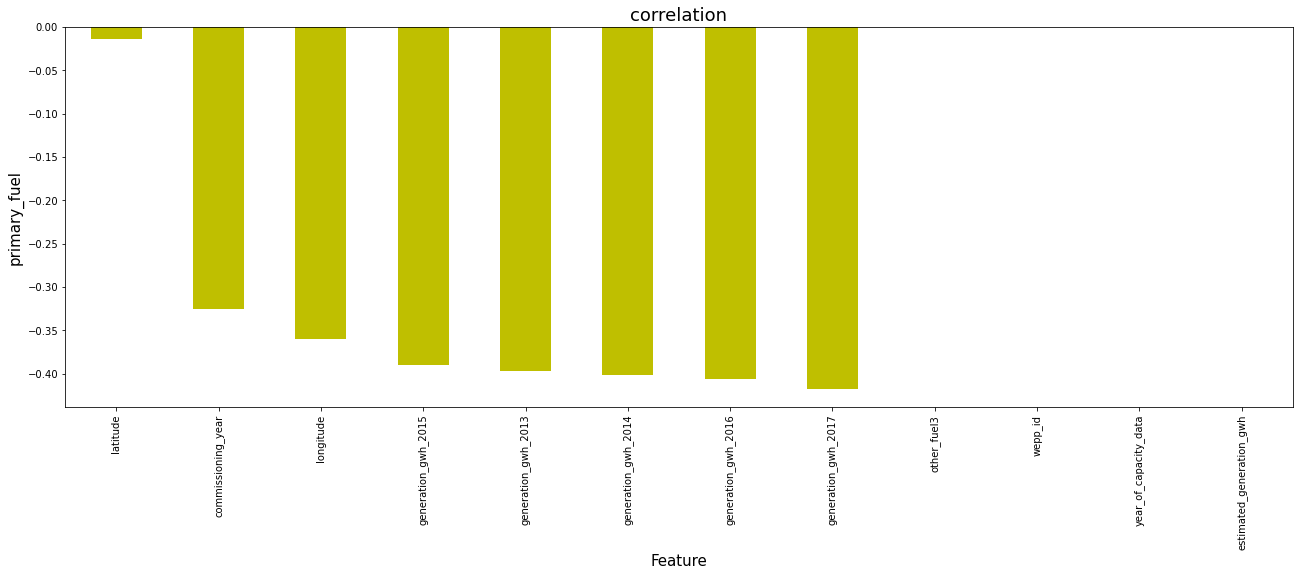

In [267]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('primary_fuel', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

As shown in plot all features are negatively correlated with target variable. There are no positive correlation in it.

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

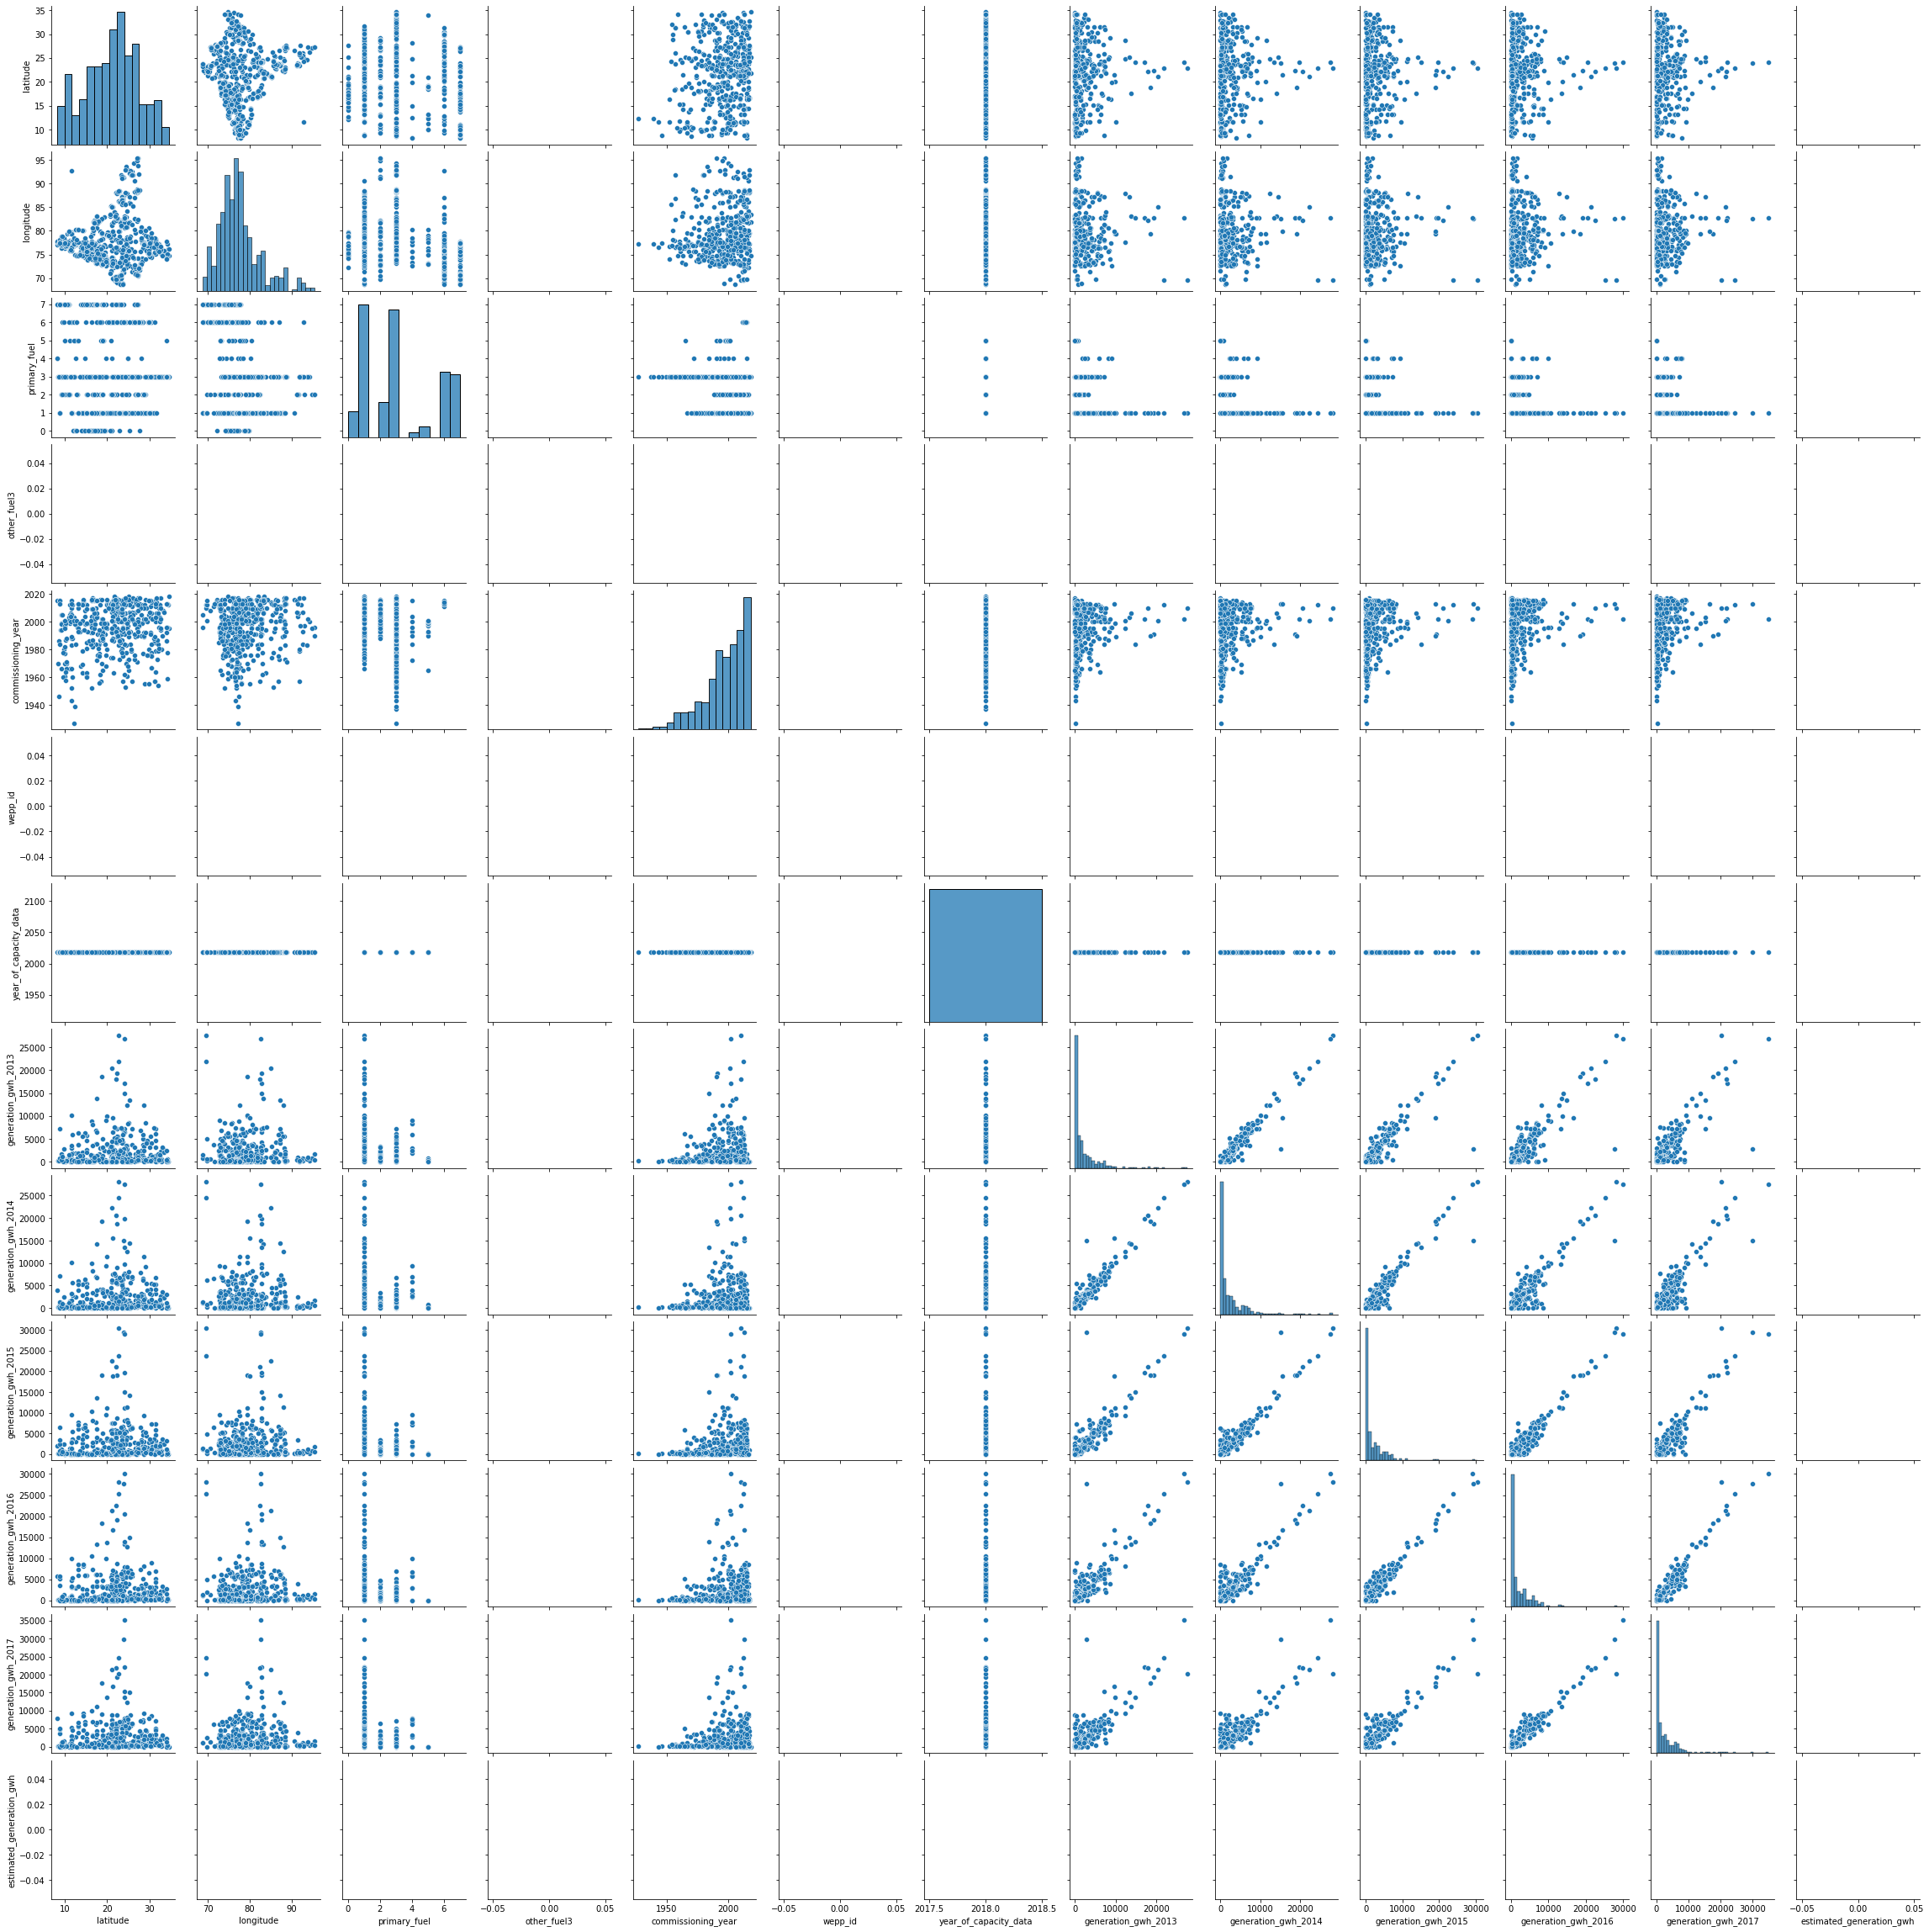

In [268]:
sn.pairplot(df)
plt.show()

In above pairplot we can see each and every coloumn relationship with each other.

## Handling missing values

In [269]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

#### 1. latitude

In [270]:
# Check unique values of latitude column
df['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 13.0977, 28.506 , 16.2804, 33.1815,
       32.8063, 23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956,
       32.1686, 24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999,
       22.9417, 25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546,
       17.3816, 20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932,
       13.7008, 13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012,
       19.5132, 21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 ,
       18.455 , 18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172,
       24.8263, 22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145,
       21.2083,  9.9

It is a Contineous column so fill null values with mean/median

In [271]:
df['latitude']= df['latitude'].fillna(df['latitude'].mean())

#### 2. longitude

In [272]:
# Check unique values of longitude column
df['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 80.2695,
       77.3066, 75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421,
       74.689 , 82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562,
       83.1889, 91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   ,
       80.2682, 78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111,
       76.7909, 77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311,
       79.7708, 73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659,
       77.7145, 74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425,
       74.6216, 78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333,
       86.0888, 85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 ,
       78.9535, 78.9

In [273]:
df['longitude']= df['longitude'].fillna(df['longitude'].mean())

#### 3. other_fuel1

In [274]:
# Check unique values of other_fuel1 column
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [275]:
df['other_fuel1']= df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

#### 4. commissioning_year

In [276]:
# Check unique values of commissioning_year column
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [277]:
df['commissioning_year']= df['commissioning_year'].fillna(df['commissioning_year'].mean())

#### 5. owner

In [278]:
# Check unique values of owner column
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [279]:
df['owner']= df['owner'].fillna(df['owner'].mode()[0])

#### 6. geolocation_source

In [280]:
# Check unique values of geolocation_source column
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [281]:
df['geolocation_source']= df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

#### 7. year_of_capacity_data

In [282]:
# Check unique values of year_of_capacity_data column
df['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [283]:
df['year_of_capacity_data']= df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean())

#### 8.generation_gwh_2013

In [284]:
# Check unique values of generation_gwh_2013 column
df['generation_gwh_2013'].unique()

array([           nan, 6.31777928e+02, 1.66829000e+03, 8.21798000e+02,
       1.47568450e+02, 6.96738800e+02, 5.04813250e+02, 2.64232200e+03,
       1.03405000e+03, 7.31334950e+02, 6.39700000e+03, 7.13299500e+03,
       1.91994200e+03, 1.73000000e+03, 0.00000000e+00, 8.04286000e+02,
       3.76900000e+03, 2.78580100e+03, 6.34849800e+02, 6.27422600e+03,
       1.64754090e+03, 1.18871000e+03, 1.65046620e+03, 1.47080900e+02,
       1.23778000e+02, 2.27570000e+00, 2.57835110e+02, 5.44672950e+02,
       4.87135000e+00, 4.48100000e+02, 1.25663600e+03, 8.21705000e-01,
       1.33876255e+03, 2.27506750e+02, 5.65200000e+03, 6.34710500e+01,
       6.17923855e+03, 9.03460000e+01, 8.56894000e+01, 2.49148000e+01,
       4.10935000e+01, 3.31861000e+03, 9.64612700e+02, 9.48732500e+01,
       3.03007350e+02, 4.36099800e+03, 1.42839040e+03, 1.52042000e+03,
       2.79729000e+01, 3.36680000e+02, 5.49337000e+03, 2.20064150e+02,
       4.16100000e+02, 3.30880000e+00, 1.38911950e+03, 2.32916565e+03,
      

In [285]:
df['generation_gwh_2013']= df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())

#### 9. generation_gwh_2014

In [286]:
df['generation_gwh_2014']= df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())

#### 10. generation_gwh_2015

In [287]:
df['generation_gwh_2015']= df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())

#### 11. generation_gwh_2016

In [288]:
df['generation_gwh_2016']= df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())

#### 12. generation_gwh_2017

In [289]:
df['generation_gwh_2017']= df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

#### 13. generation_data_source

In [290]:
# Check unique values of generation_gwh_2013 column
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [291]:
df['generation_data_source']= df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

##### After filling missing values the dataset is like 

In [292]:
df

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,28.1839,73.2407,6,Oil,NaN,NaN,...,National Renewable Energy Laboratory,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,1,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,7,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
3,IND,India,AGARTALA GT,IND0000001,23.8712,91.3602,2,Oil,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,21.9603,82.4091,1,Oil,NaN,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,16.2949,77.3568,1,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,12.8932,78.1654,6,Oil,NaN,NaN,...,Industry About,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,15.2758,75.5811,7,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
906,IND,India,ZAWAR MINES,WRI1019901,24.3500,73.7477,1,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN


after filling missing values the dataset looks like this and rest column will be drop because of poor correlation with target variable


## Encoding/dropping columns

In [293]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
latitude                    float64
longitude                   float64
primary_fuel                  int32
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [294]:
df['country'].unique()

array(['IND'], dtype=object)

There are 3 unique values present in sex column.

In [295]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

as shown in above country column is having all 908 similar values so we can drop that column

In [296]:
#drop country column 
df=df.drop(['country'], axis=1)

#### 2. country_long

In [297]:
df['country_long'].unique()

array(['India'], dtype=object)

In [298]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

as shown in above country column_long is having all 908 similar values so we can drop that column

In [299]:
#drop country_long column 
df=df.drop(['country_long'], axis=1)

#### 3. name

In [300]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [301]:
df['name'].value_counts()

Pratapgarh Solar Power Plant    1
Patnaik Jamnagar Wind Farm      1
NORTH CHENNAI EXTENSION         1
SEWA-II                         1
VENUNAGAR SUGAR                 1
                               ..
RANJANI MILL                    1
Bhat Khedi Wind Farm            1
Solitaire Solar Power Plant     1
AES Saurashtra Windfarms        1
TAMNAR TPP                      1
Name: name, Length: 908, dtype: int64

as shown in aboe name column is having all 908 similar values so we can drop that column

In [302]:
#drop name column 
df=df.drop(['name'], axis=1)

#### 4. gppd_idnr

In [303]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000018',
       'IND0000019', 'WRI1019905', 'IND0000020', 'IND0000021',
       'IND0000022', 'IND0000023', 'IND0000025', 'IND0000024',
       'WRI1019941', 'WRI1019882', 'IND0000026', 'IND0000027',
       'IND0000028', 'IND0000029', 'IND0000030', 'IND0000031',
       'IND0000032', 'WRI1019883', 'IND0000033', 'IND0000034',
       'IND0000035', 'IND0000036', 'IND0000037', 'IND00

In [304]:
df['gppd_idnr'].value_counts()

IND0000320    1
WRI1019964    1
IND0000288    1
IND0000362    1
IND0000182    1
             ..
IND0000030    1
WRI1026789    1
IND0000363    1
WRI1019902    1
WRI1019890    1
Name: gppd_idnr, Length: 908, dtype: int64

as shown in above gppd_idnr column is having all 908 similar values so we can drop that column

In [305]:
#drop gppd_idnr column 
df=df.drop(['gppd_idnr'], axis=1)

#### 5. other_fuel1

In [306]:
df['other_fuel1'].value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

as shown in above other_fuel1 column is having more than 70% data values are similar so we can drop that column

In [307]:
#drop other_fuel1 column 
df=df.drop(['other_fuel1'], axis=1)

#### 6. other_fuel2

In [308]:
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

as shown in above other_fuel2 column is having all 908 similar values. so we can drop that column

In [309]:
#drop other_fuel2 column 
df=df.drop(['other_fuel2'], axis=1)

#### 7.generation_data_source 

In [310]:
df['generation_data_source'].value_counts()

Central Electricity Authority    908
Name: generation_data_source, dtype: int64

In [311]:
#drop generation_data_source column 
df=df.drop(['generation_data_source'], axis=1)

#### 8. DROP wepp_id, other_fuel3, estimated_generation_gwh and year_of_capacity_data columns because it is having all null values

In [312]:
#drop wepp_id column 
df=df.drop(['wepp_id'], axis=1)

In [313]:
#drop other_fuel3 column 
df=df.drop(['other_fuel3'], axis=1)

In [314]:
#drop estimated_generation_gwh column 
df=df.drop(['estimated_generation_gwh'], axis=1)

In [315]:
#drop year_of_capacity_data column 
df=df.drop(['year_of_capacity_data'], axis=1)

In [316]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [317]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [318]:
df.dtypes

latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
owner                    int32
source                   int32
url                      int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

as shown above all columns are encoded now.

## Visualization of all input variables correlation with targate variable after encoding

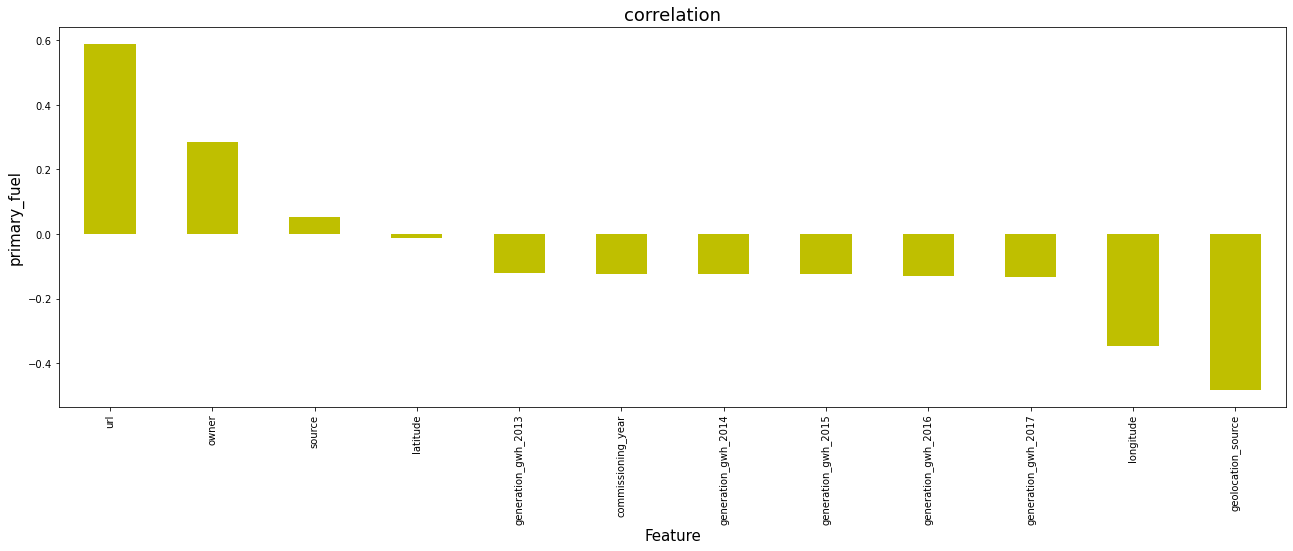

In [319]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('primary_fuel', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

## Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

In [320]:
df.describe()

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,21.196189,77.447848,3.205947,1996.876894,56.113436,43.823789,94.429515,1.733480,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,6.088110,4.781201,2.281339,12.994825,82.501086,44.624092,70.352824,0.676835,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.057825,74.390250,1.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,21.278850,76.978950,3.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,25.183775,79.211600,6.000000,2003.000000,95.250000,29.250000,115.250000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,34.649000,95.408000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


## 1.Outlier removal using Zscore

In [321]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['latitude','longitude','commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before and after
shape before         : (908, 13)
shape after          : (854, 13)
Percentage Loss      : 0.05947136563876652


5.94% data will loss after applying Zscore technique.

In [322]:
(854/908)*100

94.05286343612335

#### 94.05% data remains in dataset after using zscore technique

In [323]:
new_df.describe()

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000
mean,21.095772,77.007289,3.262295,1997.793141,59.166276,45.100703,96.645199,1.718970,2077.309031,2161.634080,2131.029136,2171.337711,2258.824007
std,6.110249,4.208855,2.326071,11.240133,83.985040,45.618112,71.928693,0.692069,1373.570489,1463.785752,1512.008568,1577.139604,1646.991085
min,8.168900,68.644700,0.000000,1958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.924050,74.275300,1.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,1434.515050,1261.939775,959.238050,936.745463,1001.702037
50%,21.196189,76.731700,3.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,25.084300,78.923000,6.000000,2003.000000,107.000000,41.750000,124.750000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,34.649000,91.565000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,8965.595000,9983.018000,10422.690000,10503.882000,9833.690000


In [324]:
new_df

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,23.8712,91.3602,2,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side

In [325]:
df2 = df

In [326]:
#features in which outliers are detected
fe = df2[['longitude','commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']]

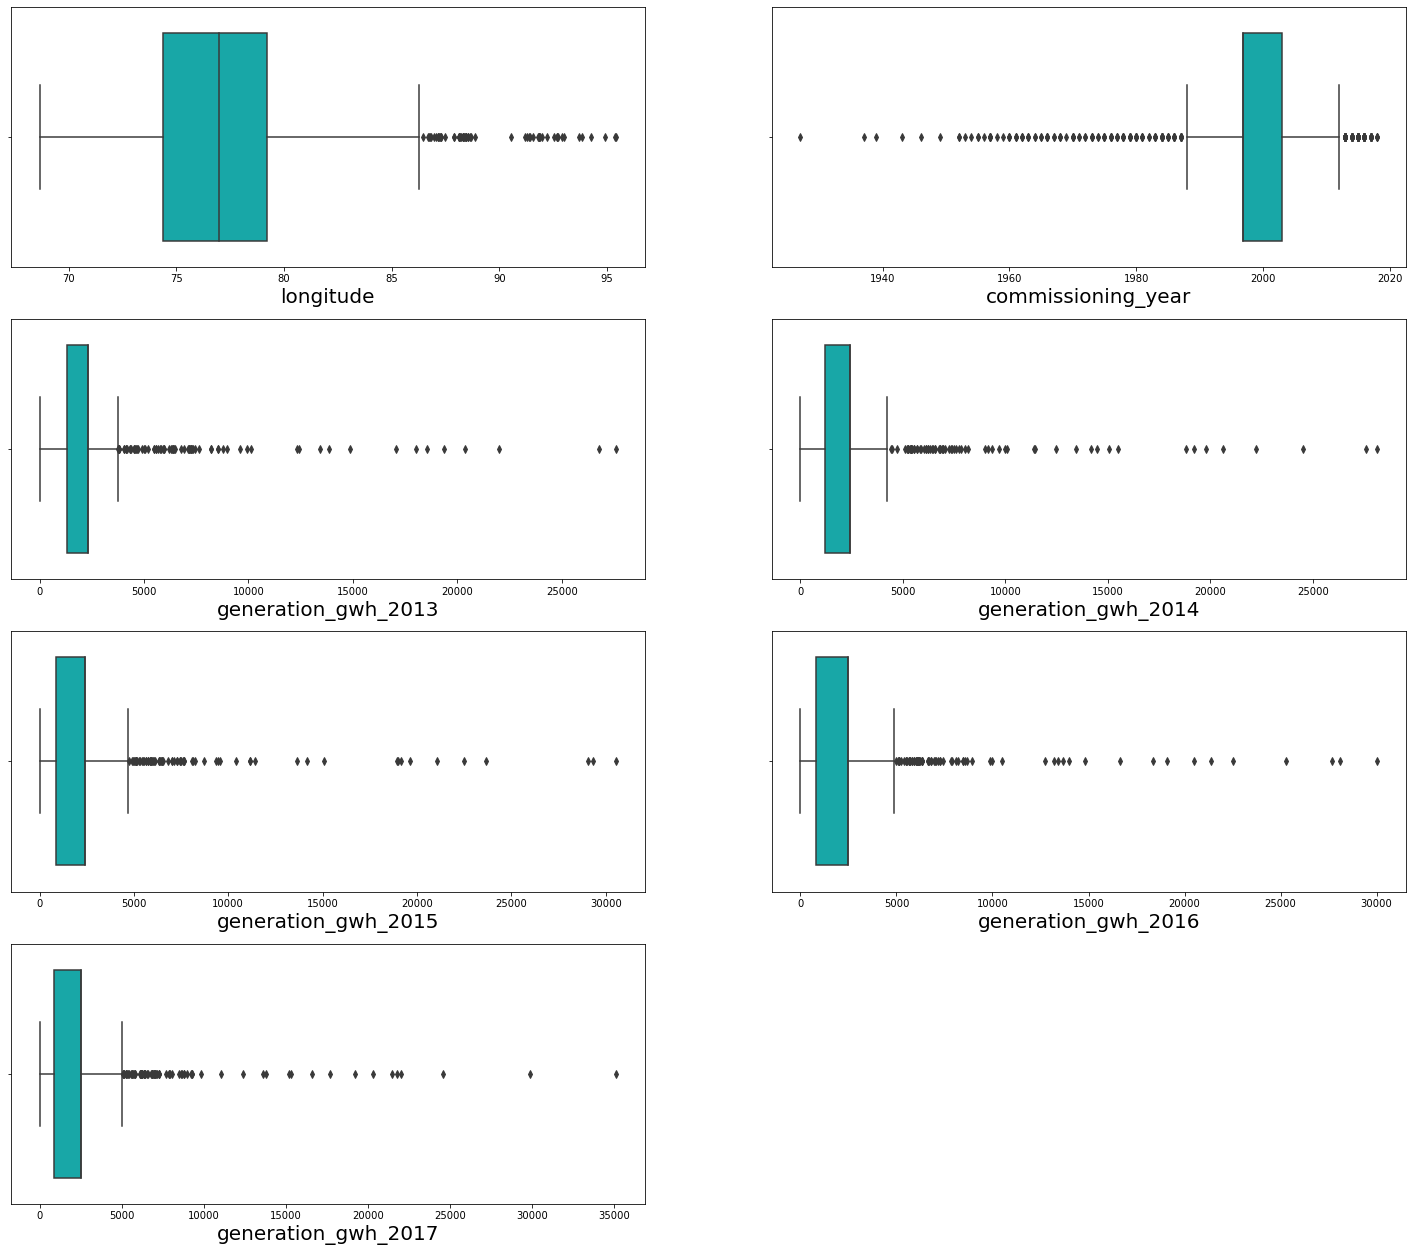

In [327]:
plt.figure(figsize=(25,45))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(8,2, graph)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [328]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = df2.quantile(0.25)

#3rd quantile 75%
q3 = df2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [329]:
df2.describe()

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,21.196189,77.447848,3.205947,1996.876894,56.113436,43.823789,94.429515,1.733480,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,6.088110,4.781201,2.281339,12.994825,82.501086,44.624092,70.352824,0.676835,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.057825,74.390250,1.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,21.278850,76.978950,3.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,25.183775,79.211600,6.000000,2003.000000,95.250000,29.250000,115.250000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,34.649000,95.408000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR)

In [330]:
#Check the Outliers for Length
#Remove outliers from lower side so, use lower side formula

longitude_out = (q3.longitude + (1.5*(iqr.longitude)))
longitude_out

86.443625

In [331]:
index_out = np.where(df2['longitude'] > longitude_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,4,21.9603,82.4091,1,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
4,5,23.7689,68.6447,1,2005.000000,5,22,58,2,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,903,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
843,904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
844,905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
845,906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


after removing outliers 847 rows will remains in dataframe. 

In [332]:
# Diameter is having outliers in lower side so use lower side formula
#Check the Outliers for Diameter
#Remove outliers from lower side so, use lower side formula

generation_gwh_2013_out = (q3.generation_gwh_2013 + (1.5*(iqr.generation_gwh_2013)))
generation_gwh_2013_out

3761.339766991147

In [333]:
index_out = np.where(df['generation_gwh_2013'] > generation_gwh_2013_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

IndexError: index 850 is out of bounds for axis 0 with size 847

after removing outliers the 4069 rows will remains in dataframe. 

In [ ]:
# Height is having outliers in lower side so use lower side formula
#Check the Outliers for Height
#Remove outliers from lower side so, use lower side formula

Height_out = (q1.Height - (1.5*(iqr.Height)))
Height_out

In [ ]:
index_out = np.where(df2['Height'] < Height_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

In [ ]:
#as shown in boxplot we have outlier in higher side of height also
#Remove outliers from higher side so, use higher side formula

Height_out = (q3.Height + (1.5*(iqr.Height)))
Height_out

In [ ]:
index_out = np.where(df2['Height'] > Height_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers the 4060 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of whole weightafter removing outliers the 4069 rows will remains in dataframe. 
#Remove outliers from higher side so, use higher side formula

Wholeweight_out = (1.153000 + (1.5*(1.153000-0.441500)))
Wholeweight_out

In [ ]:
index_out = np.where(df['Whole weight'] > Wholeweight_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers in Whole weight the 4030 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of Shucked weight 
#Remove outliers from higher side so, use higher side formula

Shuckedweight_out = (0.253000 + (1.5*(0.253000-0.186000)))
Shuckedweight_out

In [ ]:
df2['Shucked weight']

In [ ]:
index_out = np.where(df2['Shucked weight'] > Shuckedweight_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers in Shucked weight the 2101 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of Viscera weight 
#Remove outliers from higher side so, use higher side formula

Visceraweight_out = (0.502000 + (1.5*(0.502000-0.093500)))
Visceraweight_out

In [ ]:
index_out = np.where(df['Viscera weight'] > Visceraweight_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

after removing outliers in Viscera weight the 2101 rows will remains in dataframe. 

#### After removing outliers using IQR technique there are 2101 rows will remains in dataset.
Now, find how much data loss in IQR method

49.70 % data loss after using IQR technique.

50.30% data remains.

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

## Check the skewness and remove that

In [ ]:
new_df.skew()

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

Length,
Diameter.

### Check outliers datatype. If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.

In [ ]:
new_df.dtypes

## Apply Power transformation to remove skewness

In power transformation we will take the mean value in place of 0th value skewed data and convert that into normal data(distribution)/less skewed data and .

In [ ]:
#applying Power transformation on skewed columns

new_df['Length'] = new_df['Length'].replace(0,new_df['Length'].mean())
new_df['Diameter'] = new_df['Diameter'].replace(0,new_df['Diameter'].mean())

In [ ]:
sn.distplot(new_df["Length"], color = 'g')     

In [ ]:
sn.distplot(new_df["Diameter"], color = 'g')     

As shown in plot skewness removes after using power transformation skewness removes.

## Seperating the columns into featuers and target:

#### X= features, y=Target 

In [ ]:
x = new_df.drop(columns = 'Rings', axis=1)
y = new_df['Rings']

## Scalling technique

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [ ]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

as we have saw in the table vif value is greater than 5 for many columns, so drop maximum value column to avoid multiclinearity issue.

In [ ]:
new_df=new_df.drop(['Whole weight'], axis=1)

In [ ]:
x = new_df.drop(columns = 'Rings', axis=1)
y = new_df['Rings']

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Finding best random state 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 62)

# 1.Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

In [ ]:
pred_test=Lr.predict(x_test)

In [ ]:
print(r2_score(y_test,pred_test))

## Cross Validation of Linear Regression 

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

## Regularization 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

In [ ]:
ls = Lasso(alpha = 0.01, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

In [ ]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

###### The r2 score for linear regression model is : 52.50%
###### Cross validation score for linear regression is : 35.26%

# 2.Random Forest Regression 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

In [ ]:
Rfr =RandomForestRegressor(criterion = "mse", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

###### The r2 score for Random Forest Regressor model is : 53.07%
###### Cross validation score for Random Forest Regressor is : 50.07%

## 3.Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

In [ ]:
pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

In [ ]:
cv_score= cross_val_score(dtree, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

###### The r2 score for Decision tree regression model is : 14.02%
###### Cross validation score for Decision tree regression is : 25.57% 

## 4.Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

In [ ]:
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))

In [ ]:
cv_score= cross_val_score(svr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

## Compare all models

The diffrence between r2 score and cross validation score of linear regression model is : 17.24%

The diffrence between r2 score and cross validation score Random Forest Regressor model is : 3%

The diffrence between r2 score and cross validation score of Decision Tree Regressor model is : 11.55%

The diffrence between r2 score and cross validation score of SVR model is : 10.32%

### So, best model is Random Forest Regressor.

## Hyper parameter tunning

In [ ]:
#Random forest Classifier

Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

In [ ]:
GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

In [ ]:
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

In [ ]:
mod = RandomForestRegressor( criterion='mse', max_depth=7 , max_features='auto', n_estimators=700)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

after hyper parameter tuning rendom forest regressor value is 52.92%

## Saving the model

In [ ]:
import pickle

In [ ]:
#creating binary file first

with open("model_pickle", "wb") as f:
    pickle.dump(Rfrc, f)

In [ ]:
#reading Bbinary file

with open("model_pickle","rb") as f:
    mp=pickle.load(f)

Model saved